# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
#debugging only
# cities = cities[0:10]
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#create query url to scan API
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

In [5]:
#list for analysis parameters
city_name = []
city_lat = []
city_lng = []
city_country =[]
city_date =[]
city_temp = []
city_humidity = []
city_cloud_cover = []
city_wind_speed = []

In [6]:
print("Retrieving Desired City Data")
print(f"----------------------------------")
records = 0
records_set = 1

#for loop to go through each city from the API with try/except block so code doesn't break
for city in cities:
    city_url = f"{query_url}{city}"
    records = records + 1
    try:
        response = requests.get(city_url).json()
        time.sleep(0.5)
        print(f"Processing city number {records}")
        print(response)
        print()
        print()
        city_name.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        city_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_cloud_cover.append(response["clouds"]["all"])
        city_wind_speed.append(response["wind"]["speed"])
        
        #Conditional for group city outputs 
        if records > 50:
            records_set += 1
            records = 1
    except:
        print(f"City not found")

print(f"----------------------------------")
print(f"End of Data Retrieval Process")
print(f"----------------------------------")

Retrieving Desired City Data
----------------------------------
Processing city number 1
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 2
{'coord': {'lon': 27.9116, 'lat': -33.0153}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 75.9, 'feels_like': 81.7, 'temp_min': 75.9, 'temp_max': 75.9, 'pressure': 1007, 'humidity': 84, 'sea_level': 1007, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 3.89, 'deg': 320}, 'clouds': {'all': 45}, 'dt': 1613172133, 'sys': {'country': 'ZA', 'sunrise': 1613187790, 'sunset': 1613235730}, 'timezone': 7200, 'id': 1006984, 'name': 'East London', 'cod': 200}


Processing city number 3
{'coord': {'lon': -97.8558, 'lat': 55.7435}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -16.6, 'feels_like': -24.84, 'temp_min': -16.6, 'temp_max': -16.6, 'pressure': 1

Processing city number 17
{'coord': {'lon': 141.4333, 'lat': -31.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 64.4, 'feels_like': 51.89, 'temp_min': 64.4, 'temp_max': 64.4, 'pressure': 1014, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 20.71, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1613172144, 'sys': {'type': 1, 'id': 9491, 'country': 'AU', 'sunrise': 1613160617, 'sunset': 1613208413}, 'timezone': 37800, 'id': 2173911, 'name': 'Broken Hill', 'cod': 200}


Processing city number 18
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 19
{'coord': {'lon': 115.3333, 'lat': -33.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 60.08, 'feels_like': 60.26, 'temp_min': 57, 'temp_max': 62.01, 'pressure': 1016, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 94, 'gust': 5.0

Processing city number 33
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 34
{'coord': {'lon': 139.2667, 'lat': -35.1167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 61.38, 'feels_like': 61.29, 'temp_min': 60.01, 'temp_max': 64, 'pressure': 1016, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 235, 'gust': 8.99}, 'clouds': {'all': 41}, 'dt': 1613172156, 'sys': {'type': 3, 'id': 2005401, 'country': 'AU', 'sunrise': 1613160863, 'sunset': 1613209207}, 'timezone': 37800, 'id': 2065176, 'name': 'Murray Bridge', 'cod': 200}


Processing city number 35
{'coord': {'lon': -52.3333, 'lat': 4.9333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 84.47, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1010, 'humidity': 94}, 'visibility': 10000, 'wind': {'spe

Processing city number 50
{'coord': {'lon': -57.5333, 'lat': -25.3333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 89.06, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1010, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 3.02, 'deg': 121}, 'clouds': {'all': 40}, 'dt': 1613172168, 'sys': {'type': 1, 'id': 8575, 'country': 'PY', 'sunrise': 1613122464, 'sunset': 1613169270}, 'timezone': -10800, 'id': 3437056, 'name': 'San Lorenzo', 'cod': 200}


Processing city number 51
{'coord': {'lon': 102.2655, 'lat': -3.8004}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.52, 'feels_like': 83.62, 'temp_min': 77.52, 'temp_max': 77.52, 'pressure': 1011, 'humidity': 81, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.83, 'deg': 43}, 'clouds': {'all': 97}, 'dt': 1613172

Processing city number 16
{'coord': {'lon': 96.06, 'lat': 56.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -15.5, 'feels_like': -24, 'temp_min': -15.5, 'temp_max': -15.5, 'pressure': 1038, 'humidity': 86, 'sea_level': 1038, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 2.93, 'deg': 228}, 'clouds': {'all': 98}, 'dt': 1613172180, 'sys': {'country': 'RU', 'sunrise': 1613178495, 'sunset': 1613212315}, 'timezone': 25200, 'id': 1512218, 'name': 'Aban', 'cod': 200}


Processing city number 17
{'coord': {'lon': 178.4167, 'lat': 69.3833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -19.66, 'feels_like': -31.13, 'temp_min': -19.66, 'temp_max': -19.66, 'pressure': 1033, 'humidity': 82, 'sea_level': 1033, 'grnd_level': 1032}, 'visibility': 7823, 'wind': {'speed': 8.05, 'deg': 277}, 'clouds': {'all': 97}, 'dt': 1

Processing city number 33
{'coord': {'lon': -155.09, 'lat': 19.7297}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 77.05, 'feels_like': 73.53, 'temp_min': 73, 'temp_max': 82.4, 'pressure': 1016, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1613172084, 'sys': {'type': 1, 'id': 7881, 'country': 'US', 'sunrise': 1613148646, 'sunset': 1613189916}, 'timezone': -36000, 'id': 5855927, 'name': 'Hilo', 'cod': 200}


Processing city number 34
{'coord': {'lon': 102.5, 'lat': 71.9667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -27.06, 'feels_like': -38.27, 'temp_min': -27.06, 'temp_max': -27.06, 'pressure': 1028, 'humidity': 85, 'sea_level': 1028, 'grnd_level': 1024}, 'visibility': 4858, 'wind': {'speed': 7.47, 'deg': 196}, 'clouds': {'all': 91}, 'dt': 1613172192, 'sys': {'co

Processing city number 49
{'coord': {'lon': -50.2056, 'lat': -30.1811}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.51, 'feels_like': 74.48, 'temp_min': 75.51, 'temp_max': 75.51, 'pressure': 1012, 'humidity': 80, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 14.41, 'deg': 47}, 'rain': {'1h': 2.1592000000000002}, 'clouds': {'all': 100}, 'dt': 1613172203, 'sys': {'country': 'BR', 'sunrise': 1613120332, 'sunset': 1613167886}, 'timezone': -10800, 'id': 3466165, 'name': 'Cidreira', 'cod': 200}


Processing city number 50
{'coord': {'lon': 58.2056, 'lat': 38.0507}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 42.8, 'feels_like': 37.49, 'temp_min': 42.8, 'temp_max': 42.8, 'pressure': 1014, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 150}, 'clouds': {'all': 0}, 'dt': 161317220

Processing city number 15
{'coord': {'lon': 130.9889, 'lat': -25.2406}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 54.45, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1014, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 18.41, 'deg': 110}, 'clouds': {'all': 90}, 'dt': 1613172214, 'sys': {'type': 1, 'id': 9487, 'country': 'AU', 'sunrise': 1613163645, 'sunset': 1613210399}, 'timezone': 34200, 'id': 6355222, 'name': 'Yulara', 'cod': 200}


Processing city number 16
{'coord': {'lon': -133.0374, 'lat': 69.4541}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -5.8, 'feels_like': -15.07, 'temp_min': -5.8, 'temp_max': -5.8, 'pressure': 1025, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1613172215, 'sys': {'type': 1, 'id': 942, 'country': '

Processing city number 31
{'coord': {'lon': 80.5464, 'lat': 73.5069}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -25.98, 'feels_like': -39.46, 'temp_min': -25.98, 'temp_max': -25.98, 'pressure': 1027, 'humidity': 87, 'sea_level': 1027, 'grnd_level': 1021}, 'visibility': 7079, 'wind': {'speed': 11.52, 'deg': 190}, 'clouds': {'all': 88}, 'dt': 1613171654, 'sys': {'country': 'RU', 'sunrise': 1613189185, 'sunset': 1613209071}, 'timezone': 25200, 'id': 1507390, 'name': 'Dikson', 'cod': 200}


Processing city number 32
{'coord': {'lon': -35.4608, 'lat': -5.1989}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 84.67, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1011, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 160}, 'clouds': {'all': 20}, 'dt': 1613172226, 'sys': {'type': 1, 'id': 84

Processing city number 46
{'coord': {'lon': -10.8321, 'lat': 13.8065}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 83.12, 'feels_like': 76.51, 'temp_min': 83.12, 'temp_max': 83.12, 'pressure': 1009, 'humidity': 14, 'sea_level': 1009, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 4.65, 'deg': 359}, 'clouds': {'all': 0}, 'dt': 1613172236, 'sys': {'country': 'ML', 'sunrise': 1613113666, 'sunset': 1613155652}, 'timezone': 0, 'id': 2460755, 'name': 'Bafoulabé', 'cod': 200}


Processing city number 47
{'coord': {'lon': -122.9011, 'lat': 38.55}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 58.91, 'feels_like': 52.23, 'temp_min': 55.99, 'temp_max': 61, 'pressure': 1018, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1613172237, 'sys': {'type': 1, 'id': 5933, 'count

Processing city number 12
{'coord': {'lon': -121.9915, 'lat': 47.2043}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.48, 'feels_like': 23.61, 'temp_min': 26.01, 'temp_max': 32, 'pressure': 997, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 351, 'gust': 5.01}, 'clouds': {'all': 100}, 'dt': 1613172248, 'sys': {'type': 3, 'id': 2005127, 'country': 'US', 'sunrise': 1613143035, 'sunset': 1613179639}, 'timezone': -28800, 'id': 5793822, 'name': 'Enumclaw', 'cod': 200}


Processing city number 13
{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 74.84, 'feels_like': 69.93, 'temp_min': 72, 'temp_max': 77, 'pressure': 1009, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 220}, 'clouds': {'all': 0}, 'dt': 1613172248, 'sys': {'type': 1, 'id': 8691, 'cou

Processing city number 27
{'coord': {'lon': -60.7718, 'lat': -19.9309}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 76.53, 'feels_like': 80.2, 'temp_min': 76.53, 'temp_max': 76.53, 'pressure': 1007, 'humidity': 70, 'sea_level': 1007, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 3.65, 'deg': 348}, 'clouds': {'all': 21}, 'dt': 1613172258, 'sys': {'country': 'PY', 'sunrise': 1613123621, 'sunset': 1613169668}, 'timezone': -10800, 'id': 3867427, 'name': 'Mayor Pablo Lagerenza', 'cod': 200}


Processing city number 28
{'coord': {'lon': 140.3333, 'lat': -8.4667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81.21, 'feels_like': 86.5, 'temp_min': 81.21, 'temp_max': 81.21, 'pressure': 1010, 'humidity': 82, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 9265, 'wind': {'speed': 9.17, 'deg': 8}, 'clouds': {'all': 

Processing city number 42
{'coord': {'lon': 123.3711, 'lat': 66.7697}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -8.27, 'feels_like': -20.31, 'temp_min': -8.27, 'temp_max': -8.27, 'pressure': 1028, 'humidity': 90, 'sea_level': 1028, 'grnd_level': 1022}, 'visibility': 2742, 'wind': {'speed': 9.57, 'deg': 347}, 'clouds': {'all': 99}, 'dt': 1613172269, 'sys': {'country': 'RU', 'sunrise': 1613174727, 'sunset': 1613202973}, 'timezone': 32400, 'id': 2012530, 'name': 'Zhigansk', 'cod': 200}


Processing city number 43
{'coord': {'lon': -54.3833, 'lat': -33.2333}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 67.68, 'feels_like': 69.96, 'temp_min': 67.68, 'temp_max': 67.68, 'pressure': 1012, 'humidity': 95, 'sea_level': 1012, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 6.26, 'deg': 111}, 'rain': {'1h': 1.2092}, '

Processing city number 9
{'coord': {'lon': -9.4469, 'lat': 38.7992}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 52.41, 'feels_like': 50.02, 'temp_min': 50, 'temp_max': 54, 'pressure': 1026, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 200}, 'clouds': {'all': 20}, 'dt': 1613172281, 'sys': {'type': 1, 'id': 6901, 'country': 'PT', 'sunrise': 1613115153, 'sunset': 1613153500}, 'timezone': 0, 'id': 2269142, 'name': 'Colares', 'cod': 200}


Processing city number 10
{'coord': {'lon': -52.6756, 'lat': -31.395}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.99, 'feels_like': 76.55, 'temp_min': 73.99, 'temp_max': 73.99, 'pressure': 1011, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 9.51, 'deg': 52}, 'clouds': {'all': 100}, 'dt': 1613172282, 'sys': {'type': 3, 'id': 2020865, 'country': 'BR', 'su

Processing city number 26
{'coord': {'lon': -68.7425, 'lat': 10.3399}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 71.92, 'feels_like': 74.91, 'temp_min': 71.92, 'temp_max': 71.92, 'pressure': 1010, 'humidity': 85, 'sea_level': 1010, 'grnd_level': 979}, 'visibility': 10000, 'wind': {'speed': 5.79, 'deg': 46}, 'clouds': {'all': 42}, 'dt': 1613172293, 'sys': {'country': 'VE', 'sunrise': 1613127354, 'sunset': 1613169761}, 'timezone': -14400, 'id': 3628423, 'name': 'San Felipe', 'cod': 200}


Processing city number 27
{'coord': {'lon': -20.2734, 'lat': 63.4427}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 40.95, 'feels_like': 10.31, 'temp_min': 40.95, 'temp_max': 40.95, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 49.77, 'deg': 109}, 'rain': {'1h': 0.648}, 'cl

Processing city number 41
{'coord': {'lon': 34.8262, 'lat': 62.8487}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -5.4, 'feels_like': -15.63, 'temp_min': -5.4, 'temp_max': -5.4, 'pressure': 1026, 'humidity': 90, 'sea_level': 1026, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 6.46, 'deg': 184}, 'clouds': {'all': 73}, 'dt': 1613172305, 'sys': {'country': 'RU', 'sunrise': 1613194597, 'sunset': 1613225604}, 'timezone': 10800, 'id': 505820, 'name': 'Povenets', 'cod': 200}


Processing city number 42
{'coord': {'lon': -63.0578, 'lat': 18.217}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 76.01, 'temp_min': 77, 'temp_max': 77, 'pressure': 1017, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1613172306, 'sys': {'type': 1, 'id': 8788, 'cou

Processing city number 8
{'coord': {'lon': -70.4, 'lat': -23.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.6, 'feels_like': 70.11, 'temp_min': 71.6, 'temp_max': 71.6, 'pressure': 1012, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 190}, 'clouds': {'all': 0}, 'dt': 1613172294, 'sys': {'type': 1, 'id': 8488, 'country': 'CL', 'sunrise': 1613125675, 'sunset': 1613172235}, 'timezone': -10800, 'id': 3899539, 'name': 'Antofagasta', 'cod': 200}


Processing city number 9
{'coord': {'lon': 57.6142, 'lat': -19.9842}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75, 'feels_like': 79.56, 'temp_min': 75, 'temp_max': 75, 'pressure': 1013, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 137, 'gust': 15.01}, 'rain': {'1h': 0.25}, 'clouds': {'all': 12}, 'dt': 1613172318, 'sys': {'type': 3, 'id': 200

Processing city number 23
{'coord': {'lon': -1.353, 'lat': 60.3964}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 35.6, 'feels_like': 17.1, 'temp_min': 35.6, 'temp_max': 35.6, 'pressure': 1036, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 24.16, 'deg': 160}, 'clouds': {'all': 90}, 'dt': 1613172328, 'sys': {'type': 1, 'id': 1438, 'country': 'GB', 'sunrise': 1613116387, 'sunset': 1613148381}, 'timezone': 0, 'id': 2654970, 'name': 'Brae', 'cod': 200}


Processing city number 24
{'coord': {'lon': 145.575, 'lat': 43.3236}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 25.07, 'feels_like': 16.56, 'temp_min': 25.07, 'temp_max': 25.07, 'pressure': 1028, 'humidity': 93, 'sea_level': 1028, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 6.82, 'deg': 259}, 'clouds': {'all': 25}, 'dt': 1613172329, 'sys': {'c

Processing city number 40
{'coord': {'lon': 22.2014, 'lat': -33.5907}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 71.6, 'feels_like': 75.24, 'temp_min': 71.6, 'temp_max': 71.6, 'pressure': 1010, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 210}, 'clouds': {'all': 90}, 'dt': 1613172316, 'sys': {'type': 1, 'id': 1918, 'country': 'ZA', 'sunrise': 1613189112, 'sunset': 1613237149}, 'timezone': 7200, 'id': 967106, 'name': 'Oudtshoorn', 'cod': 200}


Processing city number 41
{'coord': {'lon': 55.4781, 'lat': -21.3393}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 75.4, 'feels_like': 74.05, 'temp_min': 71.01, 'temp_max': 78.8, 'pressure': 1012, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1613172341, 'sys': {'type': 1, 'id': 2127, 'country': 'RE'

Processing city number 6
{'coord': {'lon': -44.7825, 'lat': -2.4489}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 87.66, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1008, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 60}, 'rain': {'1h': 3.65}, 'clouds': {'all': 75}, 'dt': 1613172351, 'sys': {'type': 1, 'id': 8440, 'country': 'BR', 'sunrise': 1613120860, 'sunset': 1613164754}, 'timezone': -10800, 'id': 3405778, 'name': 'Bequimão', 'cod': 200}


Processing city number 7
{'coord': {'lon': -122.7002, 'lat': 58.8053}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 5, 'feels_like': -2.65, 'temp_min': 5, 'temp_max': 5, 'pressure': 1031, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 2.04, 'deg': 82}, 'clouds': {'all': 1}, 'dt': 1613172352, 'sys': {'type': 1, 'id': 986, 'country': 'C

Processing city number 22
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 23
{'coord': {'lon': 150.7967, 'lat': -2.5744}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.54, 'feels_like': 90, 'temp_min': 84.54, 'temp_max': 84.54, 'pressure': 1010, 'humidity': 72, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 8.19, 'deg': 11}, 'clouds': {'all': 48}, 'dt': 1613172188, 'sys': {'country': 'PG', 'sunrise': 1613160315, 'sunset': 1613204221}, 'timezone': 36000, 'id': 2094342, 'name': 'Kavieng', 'cod': 200}


Processing city number 24
{'coord': {'lon': 81.9667, 'lat': 23.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.11, 'feels_like': 50.7, 'temp_min': 55.11, 'temp_max': 55.11, 'pressure': 1014, 'humidity': 42, 'sea_level': 1014, 'grnd_level': 953}, 'visibilit

Processing city number 38
{'coord': {'lon': -147.8028, 'lat': 64.8569}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 6.58, 'feels_like': -2.47, 'temp_min': 1.4, 'temp_max': 10, 'pressure': 1021, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 30}, 'clouds': {'all': 20}, 'dt': 1613172374, 'sys': {'type': 1, 'id': 7683, 'country': 'US', 'sunrise': 1613152751, 'sunset': 1613182313}, 'timezone': -32400, 'id': 5859699, 'name': 'College', 'cod': 200}


Processing city number 39
{'coord': {'lon': -52.9, 'lat': 65.4167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 15.35, 'feels_like': 4.3, 'temp_min': 15.35, 'temp_max': 15.35, 'pressure': 1003, 'humidity': 88, 'sea_level': 1003, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 9.64, 'deg': 342}, 'clouds': {'all': 25}, 'dt': 1613172375, 'sys': {'coun

Processing city number 4
{'coord': {'lon': 44.5333, 'lat': -22.9}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 71.33, 'feels_like': 72.19, 'temp_min': 71.33, 'temp_max': 71.33, 'pressure': 1011, 'humidity': 84, 'sea_level': 1011, 'grnd_level': 956}, 'visibility': 10000, 'wind': {'speed': 8.81, 'deg': 34}, 'clouds': {'all': 100}, 'dt': 1613172385, 'sys': {'country': 'MG', 'sunrise': 1613184569, 'sunset': 1613230973}, 'timezone': 10800, 'id': 1057095, 'name': 'Sakaraha', 'cod': 200}


Processing city number 5
{'coord': {'lon': -47.3561, 'lat': -0.6136}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.18, 'feels_like': 82.74, 'temp_min': 79.18, 'temp_max': 79.18, 'pressure': 1008, 'humidity': 87, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 12.01, 'deg': 68}, 'clouds': {'all': 100}, 'dt'

Processing city number 20
{'coord': {'lon': 17.9442, 'lat': -33.0117}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.4, 'feels_like': 62.04, 'temp_min': 64.4, 'temp_max': 64.4, 'pressure': 1007, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 240}, 'clouds': {'all': 0}, 'dt': 1613172397, 'sys': {'type': 1, 'id': 1943, 'country': 'ZA', 'sunrise': 1613190184, 'sunset': 1613238121}, 'timezone': 7200, 'id': 3361934, 'name': 'Saldanha', 'cod': 200}


Processing city number 21
{'coord': {'lon': 103.2863, 'lat': 50.3741}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -17.32, 'feels_like': -24.92, 'temp_min': -17.32, 'temp_max': -17.32, 'pressure': 1039, 'humidity': 83, 'sea_level': 1039, 'grnd_level': 894}, 'visibility': 10000, 'wind': {'speed': 1.28, 'deg': 269}, 'clouds': {'all': 18}, 'dt': 1613172397, 'sys': {'co

Processing city number 35
{'coord': {'lon': 120.3241, 'lat': 5.1544}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.65, 'feels_like': 84.72, 'temp_min': 80.65, 'temp_max': 80.65, 'pressure': 1010, 'humidity': 80, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 10.02, 'deg': 351}, 'clouds': {'all': 100}, 'dt': 1613172407, 'sys': {'country': 'PH', 'sunrise': 1613168071, 'sunset': 1613211092}, 'timezone': 28800, 'id': 1687343, 'name': 'Sapa', 'cod': 200}


Processing city number 36
{'coord': {'lon': -84.5333, 'lat': 39.1834}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.56, 'feels_like': 14.74, 'temp_min': 25, 'temp_max': 28.4, 'pressure': 1025, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 340}, 'clouds': {'all': 90}, 'dt': 1613172408, 'sys': {'type': 1, 'id': 47

Processing city number 2
{'coord': {'lon': 145.7667, 'lat': -16.9167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 87.87, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1010, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 170}, 'clouds': {'all': 100}, 'dt': 1613172419, 'sys': {'type': 1, 'id': 9490, 'country': 'AU', 'sunrise': 1613160661, 'sunset': 1613206289}, 'timezone': 36000, 'id': 2172797, 'name': 'Cairns', 'cod': 200}


Processing city number 3
{'coord': {'lon': -77.366, 'lat': 4.9533}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.23, 'feels_like': 85.28, 'temp_min': 79.23, 'temp_max': 79.23, 'pressure': 1008, 'humidity': 87, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 7.67, 'deg': 288}, 'rain': {'1h': 0.67}, 'clouds': {'all': 94}, 'dt': 1

Processing city number 18
{'coord': {'lon': 74.4859, 'lat': 65.85}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -26.14, 'feels_like': -34.76, 'temp_min': -26.14, 'temp_max': -26.14, 'pressure': 1030, 'humidity': 85, 'sea_level': 1030, 'grnd_level': 1023}, 'visibility': 809, 'wind': {'speed': 2.89, 'deg': 159}, 'clouds': {'all': 100}, 'dt': 1613172432, 'sys': {'country': 'RU', 'sunrise': 1613186073, 'sunset': 1613215091}, 'timezone': 18000, 'id': 1495626, 'name': 'Pangody', 'cod': 200}


Processing city number 19
{'coord': {'lon': -41.3, 'lat': -21.75}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.26, 'feels_like': 80.71, 'temp_min': 76.26, 'temp_max': 76.26, 'pressure': 1015, 'humidity': 86, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 7.27, 'deg': 61}, 'rain': {'1h': 7.488}, 'c

Processing city number 33
{'coord': {'lon': 119.4011, 'lat': 41.24}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 32.49, 'feels_like': 27.12, 'temp_min': 32.49, 'temp_max': 32.49, 'pressure': 1022, 'humidity': 94, 'sea_level': 1022, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 2.91, 'deg': 192}, 'clouds': {'all': 97}, 'dt': 1613172442, 'sys': {'country': 'CN', 'sunrise': 1613170818, 'sunset': 1613208788}, 'timezone': 28800, 'id': 2036075, 'name': 'Lingyuan', 'cod': 200}


Processing city number 34
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 35
{'coord': {'lon': 108.3897, 'lat': 30.8039}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.44, 'feels_like': 53.2, 'temp_min': 55.44, 'temp_max': 55.44, 'pressure': 1017, 'humidity': 68, 'sea_level': 1017, 'grnd_level': 1002}, 'vis

Processing city number 49
{'coord': {'lon': -99.8901, 'lat': 16.8634}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 80.83, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1008, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 260}, 'clouds': {'all': 20}, 'dt': 1613172453, 'sys': {'type': 1, 'id': 7103, 'country': 'MX', 'sunrise': 1613135222, 'sunset': 1613176844}, 'timezone': -21600, 'id': 3533462, 'name': 'Acapulco de Juárez', 'cod': 200}


Processing city number 50
{'coord': {'lon': 8.8879, 'lat': 14.9709}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.48, 'feels_like': 58.77, 'temp_min': 69.48, 'temp_max': 69.48, 'pressure': 1013, 'humidity': 20, 'sea_level': 1013, 'grnd_level': 953}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 43}, 'clouds': {'all': 0}, 'dt': 1613172454, 'sys

Processing city number 16
{'coord': {'lon': -75.833, 'lat': 42.2506}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19.04, 'feels_like': 11.37, 'temp_min': 17.01, 'temp_max': 21, 'pressure': 1023, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 2.53, 'deg': 11}, 'clouds': {'all': 90}, 'dt': 1613172465, 'sys': {'type': 1, 'id': 3429, 'country': 'US', 'sunrise': 1613131411, 'sunset': 1613169107}, 'timezone': -18000, 'id': 5110365, 'name': 'Broome', 'cod': 200}


Processing city number 17
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 18
{'coord': {'lon': 59.6062, 'lat': 36.297}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 34.83, 'temp_min': 41, 'temp_max': 41, 'pressure': 1018, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 200}, 'clouds': {'al

Processing city number 33
{'coord': {'lon': 76.1333, 'lat': 32.5667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.4, 'feels_like': 46.54, 'temp_min': 55.4, 'temp_max': 55.4, 'pressure': 1020, 'humidity': 31, 'sea_level': 1020, 'grnd_level': 912}, 'visibility': 10000, 'wind': {'speed': 7.83, 'deg': 77}, 'clouds': {'all': 100}, 'dt': 1613172478, 'sys': {'country': 'IN', 'sunrise': 1613180435, 'sunset': 1613219939}, 'timezone': 19800, 'id': 1274848, 'name': 'Chamba', 'cod': 200}


Processing city number 34
{'coord': {'lon': 153.6167, 'lat': -28.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.26, 'feels_like': 77.94, 'temp_min': 78.01, 'temp_max': 78.8, 'pressure': 1009, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 350}, 'clouds': {'all': 91}, 'dt': 1613171731, 'sys': {'type': 1, 'id': 949

Processing city number 49
{'coord': {'lon': -124.1573, 'lat': 40.5982}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 52.03, 'feels_like': 50.52, 'temp_min': 50, 'temp_max': 53.01, 'pressure': 1018, 'humidity': 100}, 'visibility': 2414, 'wind': {'speed': 3.83, 'deg': 194}, 'clouds': {'all': 90}, 'dt': 1613172316, 'sys': {'type': 1, 'id': 4127, 'country': 'US', 'sunrise': 1613142833, 'sunset': 1613180881}, 'timezone': -28800, 'id': 5563839, 'name': 'Fortuna', 'cod': 200}


Processing city number 50
{'coord': {'lon': 122.6711, 'lat': 10.9995}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 76.33, 'feels_like': 83.07, 'temp_min': 76.33, 'temp_max': 76.33, 'pressure': 1011, 'humidity': 89, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.25, 'deg': 341}, 'rain': {'1h': 0.20980000000000001}, 'clouds': 

Processing city number 15
{'coord': {'lon': 104.1833, 'lat': 10.6167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 80.55, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1011, 'humidity': 94}, 'visibility': 9000, 'wind': {'speed': 2.3, 'deg': 30}, 'clouds': {'all': 40}, 'dt': 1613172500, 'sys': {'type': 1, 'id': 9312, 'country': 'KH', 'sunrise': 1613172260, 'sunset': 1613214650}, 'timezone': 25200, 'id': 1831112, 'name': 'Kampot', 'cod': 200}


Processing city number 16
{'coord': {'lon': 147.2712, 'lat': -2.0226}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.34, 'feels_like': 91.27, 'temp_min': 84.34, 'temp_max': 84.34, 'pressure': 1010, 'humidity': 72, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 5.37, 'deg': 319}, 'clouds': {'all': 95}, 'dt': 1613172501, 'sys

Processing city number 31
{'coord': {'lon': -117.2859, 'lat': 55.0667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1.4, 'feels_like': -7.17, 'temp_min': 1.4, 'temp_max': 1.4, 'pressure': 1036, 'humidity': 60, 'sea_level': 1036, 'grnd_level': 946}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 150}, 'clouds': {'all': 100}, 'dt': 1613172512, 'sys': {'type': 1, 'id': 723, 'country': 'CA', 'sunrise': 1613143058, 'sunset': 1613177357}, 'timezone': -25200, 'id': 6173220, 'name': 'Valleyview', 'cod': 200}


Processing city number 32
{'coord': {'lon': -91.3, 'lat': 14.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.62, 'feels_like': 85.1, 'temp_min': 68, 'temp_max': 86, 'pressure': 1011, 'humidity': 66}, 'visibility': 8000, 'wind': {'speed': 9.22, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1613172512, 'sys': {'type': 

Processing city number 47
{'coord': {'lon': 134.6333, 'lat': 67.6333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -17.95, 'feels_like': -25.46, 'temp_min': -17.95, 'temp_max': -17.95, 'pressure': 1031, 'humidity': 85, 'sea_level': 1031, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 1.1, 'deg': 233}, 'clouds': {'all': 13}, 'dt': 1613172523, 'sys': {'country': 'RU', 'sunrise': 1613172397, 'sunset': 1613199897}, 'timezone': 36000, 'id': 2027044, 'name': 'Batagay', 'cod': 200}


Processing city number 48
{'coord': {'lon': 92.75, 'lat': 11.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.24, 'feels_like': 80.65, 'temp_min': 78.24, 'temp_max': 78.24, 'pressure': 1011, 'humidity': 77, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 9.66, 'deg': 41}, 'clouds': {'all': 89}, 'dt': 

Processing city number 13
{'cod': '404', 'message': 'city not found'}


City not found
Processing city number 14
{'coord': {'lon': -17.0347, 'lat': 20.931}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.4, 'feels_like': 54.95, 'temp_min': 64.4, 'temp_max': 64.4, 'pressure': 1018, 'humidity': 77}, 'visibility': 7000, 'wind': {'speed': 20.71, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1613172535, 'sys': {'type': 1, 'id': 2444, 'country': 'MR', 'sunrise': 1613115602, 'sunset': 1613156693}, 'timezone': 0, 'id': 2377457, 'name': 'Nouadhibou', 'cod': 200}


Processing city number 15
{'coord': {'lon': 111.9767, 'lat': 43.6475}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 7.2, 'feels_like': -3.53, 'temp_min': 7.2, 'temp_max': 7.2, 'pressure': 1030, 'humidity': 89, 'sea_level': 1030, 'grnd_level': 909}, 'visibility': 10000, 'wind': {'speed':

Processing city number 30
{'coord': {'lon': 37.2685, 'lat': 25.0213}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.85, 'feels_like': 74.75, 'temp_min': 75.85, 'temp_max': 75.85, 'pressure': 1012, 'humidity': 58, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 7.76, 'deg': 320}, 'clouds': {'all': 0}, 'dt': 1613172546, 'sys': {'country': 'SA', 'sunrise': 1613189210, 'sunset': 1613229819}, 'timezone': 10800, 'id': 100926, 'name': 'Umluj', 'cod': 200}


Processing city number 31
{'coord': {'lon': 28.2333, 'lat': 43.9}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19.98, 'feels_like': 12.43, 'temp_min': 19, 'temp_max': 21, 'pressure': 1022, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 290, 'gust': 8.99}, 'clouds': {'all': 100}, 'dt': 1613172547, 'sys': {'type': 3, 'id': 203567

Processing city number 45
{'coord': {'lon': 82.8265, 'lat': 58.3631}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -21.39, 'feels_like': -31.32, 'temp_min': -21.39, 'temp_max': -21.39, 'pressure': 1036, 'humidity': 87, 'sea_level': 1036, 'grnd_level': 1027}, 'visibility': 10000, 'wind': {'speed': 5.32, 'deg': 211}, 'clouds': {'all': 85}, 'dt': 1613172557, 'sys': {'country': 'RU', 'sunrise': 1613182004, 'sunset': 1613215158}, 'timezone': 25200, 'id': 1489499, 'name': 'Togur', 'cod': 200}


Processing city number 46
{'coord': {'lon': -76.7716, 'lat': -6.934}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 87.73, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1008, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 260}, 'clouds': {'all': 40}, 'dt': 1613172558, 'sys': {'type': 1, 'id':

Processing city number 12
{'coord': {'lon': -38.3911, 'lat': -3.9014}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 88.12, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1010, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 70}, 'clouds': {'all': 20}, 'dt': 1613172569, 'sys': {'type': 1, 'id': 8363, 'country': 'BR', 'sunrise': 1613119241, 'sunset': 1613163305}, 'timezone': -10800, 'id': 3407407, 'name': 'Aquiraz', 'cod': 200}


Processing city number 13
{'coord': {'lon': -74.8492, 'lat': 49.7834}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -2.2, 'feels_like': -12.66, 'temp_min': -2.2, 'temp_max': -2.2, 'pressure': 1024, 'humidity': 78}, 'visibility': 4828, 'wind': {'speed': 6.91, 'deg': 290}, 'snow': {'1h': 0.24}, 'clouds': {'all': 90}, 'dt': 1613172570, 'sys': {'type': 1, 'id': 859, 'co

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_weather_df = pd.DataFrame({"City":city_name, "Latitude":city_lat, "Longitude":city_lng, "Country":city_country, "Date":city_date, "Max Temperature":city_temp, "Humidity":city_humidity, "Cloudiness":city_cloud_cover, "Wind Speed":city_wind_speed})
city_weather_df.head()

,City,Latitude,Longitude,Country,Date,Max Temperature,Humidity,Cloudiness,Wind Speed
0,East London,-33.0153,27.9116,ZA,1613172133,75.90,84,45,3.89
1,Thompson,55.7435,-97.8558,CA,1613172001,-16.60,63,1,2.30
2,Mar del Plata,-38.0023,-57.5575,AR,1613171808,69.80,94,90,13.80
3,Ushuaia,-54.8000,-68.3000,AR,1613172082,59.00,41,75,12.66
4,Patitiri,39.1500,23.8667,GR,1613172137,49.51,66,99,9.64


In [10]:
city_weather_df.to_csv("City_Weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
city_weather_df["Humidity"].max()

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

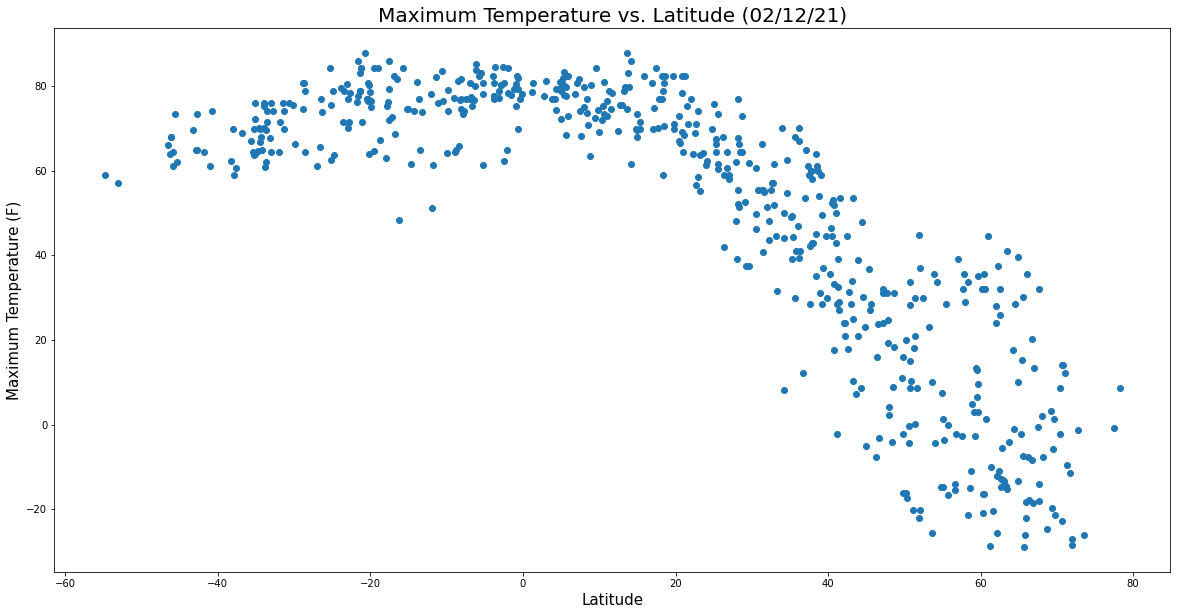

In [14]:
#Assign data to new variables
latitude = city_weather_df["Latitude"]
temperature = city_weather_df["Max Temperature"]

#Plot scatter plot with x and y values
plt.figure(figsize = (20,10))
plt.scatter(latitude, temperature)

#create x- and y-axis labels and a chart title
plt.title(f"Maximum Temperature vs. Latitude (%s)" % time.strftime("%x"), fontsize = 20)
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Maximum Temperature (F)", fontsize = 15)
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression